## Image preprocessing steps in CIFAR Tutorial

**Bugs fixes from original code :**

>1) Do not use **tf.cast** to conver to float. This destroyes the input image

>2) Adjusting brightness and saturation should be done on **uint8** format images

In [1]:
import tensorflow as tf
import os
%matplotlib inline
import matplotlib.pyplot as plt

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


### Utilities

In [2]:
def run_tf(x):
    
    config = tf.ConfigProto()
    config.gpu_options.allow_growth=True
    with tf.Session(config=config) as sess:    
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)

        out = sess.run(x)

        coord.request_stop()
        coord.join(threads)
        
        return out

### Create queue and reader

**Remember**

> Use **tf.image.covert_image_dtype** to convert image datatype

> float images have pixels in the range (0,1)

In [36]:
data_dir = "/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin"
filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i) for i in range(1, 6)]
filename_queue = tf.train.string_input_producer(filenames,seed=0)

record_bytes = 32*32*3+1
reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)

key, value = reader.read(filename_queue)

##Decode
decoded = tf.decode_raw(value, tf.uint8)
label = tf.strided_slice(decoded,[0],[1])
label = tf.cast(label,tf.int32)
label = tf.reshape(label,[1])

image = tf.strided_slice(decoded,[1],[record_bytes])
image = tf.reshape(image,[3,32,32])
image = tf.transpose(image,[1,2,0])
#image = tf.cast(image,tf.float32)
image = tf.image.convert_image_dtype(image,tf.float32) ## Not really necessary to convert unless resizing

array([[[0.13725491, 0.09803922, 0.10196079],
        [0.10588236, 0.08235294, 0.08235294],
        [0.09803922, 0.07843138, 0.07450981],
        ...,
        [0.5176471 , 0.5058824 , 0.5058824 ],
        [0.52156866, 0.47450984, 0.454902  ],
        [0.49411768, 0.45098042, 0.4431373 ]],

       [[0.24705884, 0.21568629, 0.19607845],
        [0.1254902 , 0.10588236, 0.08235294],
        [0.06666667, 0.0509804 , 0.03137255],
        ...,
        [0.40000004, 0.37254903, 0.34509805],
        [0.41176474, 0.34901962, 0.29803923],
        [0.3921569 , 0.3372549 , 0.3019608 ]],

       [[0.38823533, 0.35686275, 0.32941177],
        [0.19215688, 0.1764706 , 0.14509805],
        [0.05882353, 0.04705883, 0.01960784],
        ...,
        [0.18039216, 0.16862746, 0.15294118],
        [0.20392159, 0.16078432, 0.13333334],
        [0.20392159, 0.17254902, 0.16078432]],

       ...,

       [[0.6509804 , 0.64705884, 0.67058825],
        [0.6431373 , 0.6392157 , 0.6509804 ],
        [0.6431373 , 0

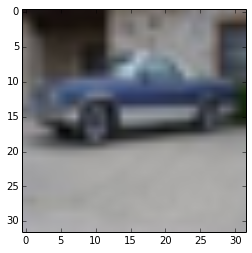

In [37]:
im = run_tf(image)
plt.imshow(im)
im

### Random crop

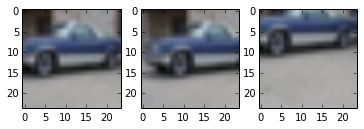

In [38]:
for j in range(3):
    plt.subplot(1, 3, j+1)
    distorted_image = tf.random_crop(image, [24, 24, 3])
    di = run_tf(distorted_image)
    plt.imshow(di)
plt.show()

### Random flip

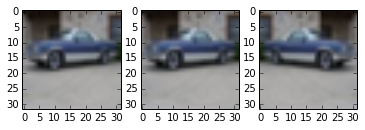

In [39]:
for j in range(3):
    plt.subplot(1, 3, j+1)
    distorted_image = tf.image.random_flip_left_right(image)
    di = run_tf(distorted_image)
    plt.imshow(di)
plt.show()

### Random brightness

To be applied on **uint8** image

Some times appears black. (maybe when delta is very low. **random_brightness** doesn't not seem safe to use)

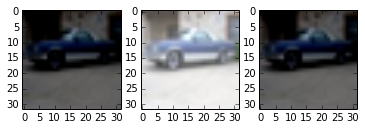

In [42]:
int_image = tf.image.convert_image_dtype(image,tf.uint8)
for j in range(3):
    plt.subplot(1, 3, j+1)
    distorted_image = tf.image.random_brightness(int_image,max_delta=0.8)
    di = run_tf(distorted_image)
    plt.imshow(di)
plt.show()

### Random contrast

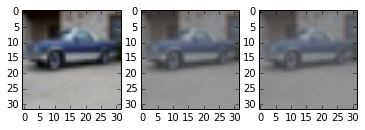

In [43]:
int_image = tf.image.convert_image_dtype(image,tf.uint8)
for j in range(3):
    plt.subplot(1, 3, j+1)
    distorted_image = tf.image.random_contrast(int_image,lower=0.5,upper=1.8)
    di = run_tf(distorted_image)
    plt.imshow(di)
plt.show()

### Image standardization

Change pixel values to 0 mean and unit variance

Outputs the same numbers for both uint8 and float images (as expected)

**Not sure if this does not destroy performance (if not improve)**

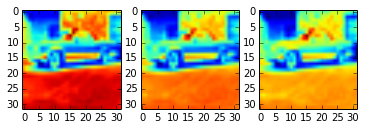

[[[-1.6786933  -1.875761   -1.8560542 ]
  [-1.8363475  -1.954588   -1.954588  ]
  [-1.875761   -1.9742948  -1.9940016 ]
  ...
  [ 0.23286317  0.17374288  0.17374288]
  [ 0.25256994  0.01608873 -0.08244511]
  [ 0.11462257 -0.10215188 -0.14156541]]

 [[-1.1269038  -1.2845579  -1.3830918 ]
  [-1.7378136  -1.8363475  -1.954588  ]
  [-2.033415   -2.1122422  -2.210776  ]
  ...
  [-0.35833988 -0.49628723 -0.6342346 ]
  [-0.29921955 -0.6145278  -0.87071586]
  [-0.3977534  -0.6736482  -0.8510091 ]]

 [[-0.41746017 -0.5751143  -0.7130617 ]
  [-1.4027985  -1.4816257  -1.6392798 ]
  [-2.0728288  -2.131949   -2.2698963 ]
  ...
  [-1.4619188  -1.5210391  -1.5998663 ]
  [-1.3436782  -1.5604527  -1.6984001 ]
  [-1.3436782  -1.5013324  -1.5604527 ]]

 ...

 [[ 0.9028933   0.8831865   1.0014272 ]
  [ 0.86347973  0.843773    0.9028933 ]
  [ 0.86347973  0.86347973  0.8831865 ]
  ...
  [ 1.0408406   1.0211339   0.9817204 ]
  [ 0.9817204   0.9817204   0.9423068 ]
  [ 0.92260003  0.92260003  0.92260003]]

 [

In [79]:
int_image = tf.image.convert_image_dtype(image,tf.uint8)
float_image = tf.image.per_image_standardization(int_image)
fi = run_tf(float_image)
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.imshow(fi[:,:,j])
plt.show()
print(fi)